# Plotting Data Distributions

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,4,0.768,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,4,0.795,0.615,5,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,5,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,80,0.762,0.700,9,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073


### 2. Get a grasp of all possible values in each column
1. Get length of all unique entries in each columns with string type (dtype: object)
> Q: Why are there more track ids than track names? List all possible reasons you could think. 
2. Confirm if the range (range = max - min) of the song metrics columns (danceability, energy, ...) matches what is declared in the documentation 
3. Using `describe`, generate a table of basic statistics for the song metrics columns
> Q: Give 3 insights based on the output of `describe`

In [3]:
len(tracks_df['track_id'].unique())

2292

In [4]:
len(tracks_df['track_name'].unique())

1827

In [5]:
len(tracks_df['album_id'].unique())

1629

In [6]:
tracks_df['key'].unique()

array([ 7,  8,  5,  9,  1, 10, 11,  2,  6,  0,  3,  4], dtype=int64)

In [11]:
tracks_df['mode'].unique()

array([0, 1], dtype=int64)

In [12]:
tracks_df[['popularity', 'danceability', 'energy',
       'loudness','speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000,2292.000000
mean,53.542321,0.635396,0.591876,-6.876896,0.083546,0.286942,0.009645,0.168288,0.455961,118.496587
std,28.083859,0.143064,0.190003,2.860197,0.083280,0.277537,0.069810,0.126592,0.213066,28.125389
min,0.000000,0.184000,0.054100,-24.250000,0.023200,0.000002,0.000000,0.021500,0.039800,52.572000
25%,44.000000,0.547000,0.461000,-8.291000,0.035800,0.053150,0.000000,0.092900,0.288750,96.977750
50%,63.000000,0.653000,0.602000,-6.428500,0.050950,0.186000,0.000000,0.118000,0.446500,116.004000
75%,74.000000,0.736000,0.738000,-4.876250,0.090550,0.468000,0.000017,0.200250,0.608000,136.056500
max,100.000000,0.953000,0.969000,0.175000,0.733000,0.979000,0.908000,0.955000,0.973000,207.476000


### 3. Histograms
We can now try to plot histograms of the datasets
Put simply, histograms are graphical representation of tallies.
Read more about histograms here: (https://statistics.laerd.com/statistical-guides/understanding-histograms.php).

These are very useful in EDA because at a glance, you could already see how the data is spread over its range.

In particular, you should look out for:
1. Skewness - Do the values peak around the mean, or over lower (left-skewed)/higher values(right-skewed)?
2. Mode - Does it have one peak (unimodal)? two peaks (bimodal)? How many peaks?
3. Outliers - Are there a few data points that are substantially distant from bulk of all values?

It is strongly advised that you look at histograms before you do any aggregations.

> Q: Modify the code below to plot histograms for all the numeric columns in df. For each histogram, create a markdown cell below and write a 1-3 sentence about what you observe in the plot.

In [13]:
tracks_df.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [18]:
#make duration ms to minutes
tracks_df['duration_mins']=tracks_df['duration']/60000

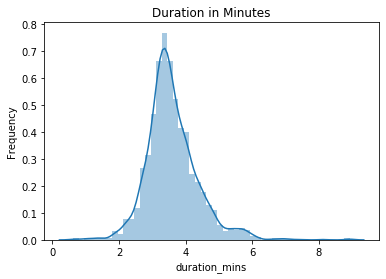

In [19]:
sns.distplot(tracks_df['duration_mins'])
plt.title('Duration in Minutes')
plt.ylabel('Frequency')
plt.show()

#sometimes the line might not fit the histogram bars. 
#these are called Gaussian Kernel Density Estimations and we dont expect them to work for noncontinuous values

- Most tracks in the Top 200 tend to last around 3-4 mins. There are more songs that last longer than 4 mins than songs that are shorter than 2.5 mins.

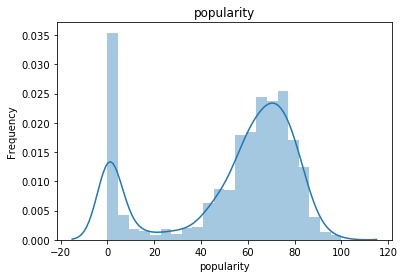

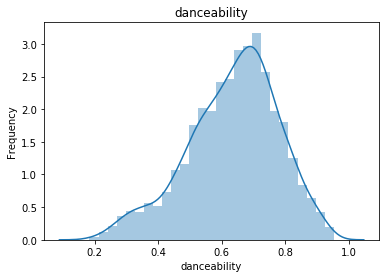

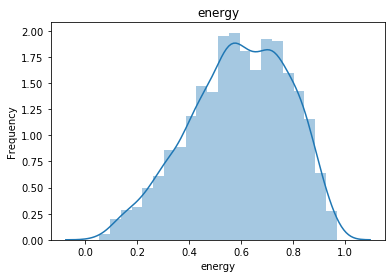

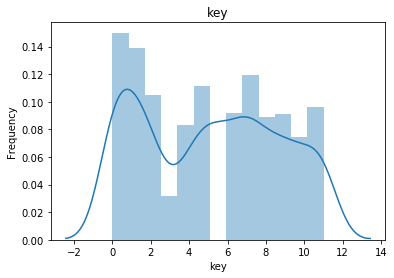

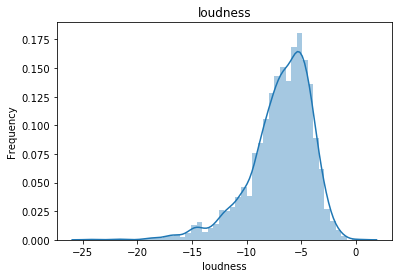

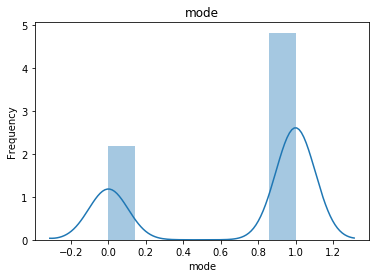

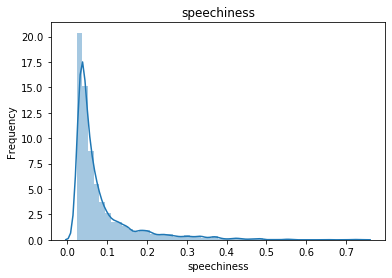

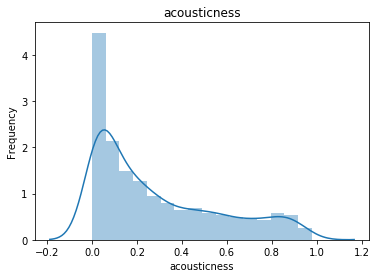

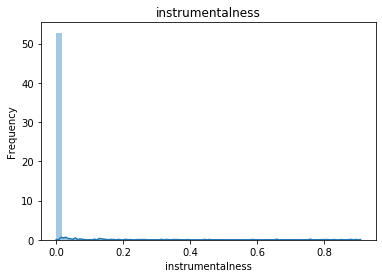

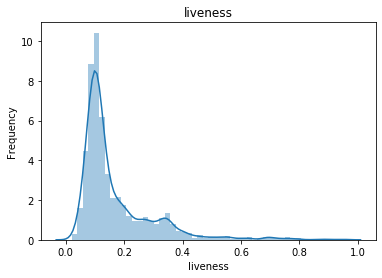

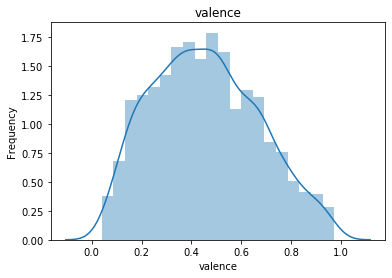

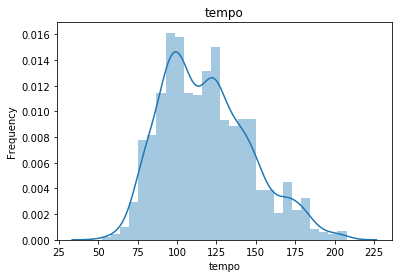

In [20]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(tracks_df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


## 4. Distribution Properties
### Skewness
[Skewness](https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860) lets you test by how much the overall shape of a distribution deviates from the shape of the normal distribution.
   - Skew < 0 indicates that the tail is on the left side of the distribution, which extends towards more negative values.(left-tailed/left-modal)
   - Skew > 0 indicates that the tail is on the right side of the distribution, which extends towards more positive values.(right-tailed/right-modal)
   - Skew = 0 indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

<div>
<img src="https://www.conversion-uplift.co.uk/wp-content/uploads/2020/06/Skewness-photo.png" width="500"/>
</div>

In [21]:
from scipy.stats import skew, kurtosis

In [34]:
def skew_type(skewval, skewthres):
    test_skew_value = abs(skewval)-skewthres    
    if (test_skew_value > 0) & (np.sign(skewval)>0):
        return "right-tailed"
    elif  (test_skew_value > 0) & (np.sign(skewval)<0):
        return "left-tailed"
    else:
        return "approximately symmetric"
    


In [35]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Skewness of variable %s : %0.2f (%s)" %(col, skew(tracks_df[col]), skew_type(skew(tracks_df[col]),0.1)))


Skewness of variable popularity : -0.95 (left-tailed)
Skewness of variable danceability : -0.47 (left-tailed)
Skewness of variable energy : -0.34 (left-tailed)
Skewness of variable key : 0.05 (approximately symmetric)
Skewness of variable loudness : -1.20 (left-tailed)
Skewness of variable mode : -0.81 (left-tailed)
Skewness of variable speechiness : 2.79 (right-tailed)
Skewness of variable acousticness : 0.89 (right-tailed)
Skewness of variable instrumentalness : 9.90 (right-tailed)
Skewness of variable liveness : 2.36 (right-tailed)
Skewness of variable valence : 0.25 (right-tailed)
Skewness of variable tempo : 0.55 (right-tailed)


### Kurtosis
[Kurtosis](https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860) is a measure of how differently shaped are the tails of a distribution as compared to the tails of the normal distribution. While skewness focuses on the overall shape, Kurtosis focuses on the tail shape.

![Kurtosis](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fimg.tfd.com%2Fmk%2FK%2FX2604-K-11.png&f=1&nofb=1)

- The kurtosis of a normal distribution is 3.
- If kurtosis<3, it is said to be *playkurtic*, which means it tends to produce fewer and less extreme outliers than the normal distribution.
- If kurtosis>3, it is said to be *leptokurtic*, which means it tends to produce more outliers than the normal distribution.

In [39]:
def kurtosis_type(kurtval, kurtthres):
    test_kurtosis_value = abs(kurtval-kurtthres)
    #in scipy's implementation, 3 is subtracted from the original definition of kurtosis
    
    if (test_kurtosis_value > 0) & (np.sign(kurtval)>0):
        return "heavy-tailed"
    elif  (test_kurtosis_value  > 0) & (np.sign(kurtval)<0):
        return "light-tailed"
    else:
        return "approximately normal"
    


In [42]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    print("Kurtosis of variable %s : %0.2f (%s)" %(col, kurtosis(tracks_df[col]), kurtosis_type(kurtosis(tracks_df[col]),0.1)))


Kurtosis of variable popularity : -0.47 (light-tailed)
Kurtosis of variable danceability : -0.05 (light-tailed)
Kurtosis of variable energy : -0.51 (light-tailed)
Kurtosis of variable key : -1.28 (light-tailed)
Kurtosis of variable loudness : 2.44 (heavy-tailed)
Kurtosis of variable mode : -1.34 (light-tailed)
Kurtosis of variable speechiness : 9.67 (heavy-tailed)
Kurtosis of variable acousticness : -0.44 (light-tailed)
Kurtosis of variable instrumentalness : 106.03 (heavy-tailed)
Kurtosis of variable liveness : 7.05 (heavy-tailed)
Kurtosis of variable valence : -0.68 (light-tailed)
Kurtosis of variable tempo : -0.16 (light-tailed)


## Day Deliverable
(Individual) Pick an artist and compare each of the audio features distribution of his/her songs to all the charting tracks in the whole time period. What does this say about the artist?

### Resources
More details on skewness and kurtosis [here](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) and [here](https://brownmath.com/stat/shape.htm)



In [10]:
tracks_df_sam_smith = tracks_df[tracks_df['artist_name'] == "Sam Smith"]

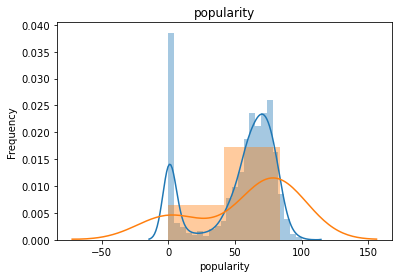

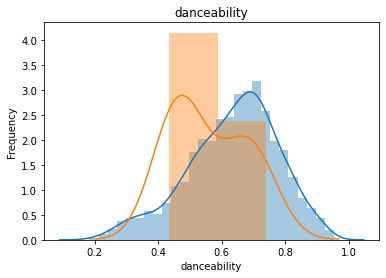

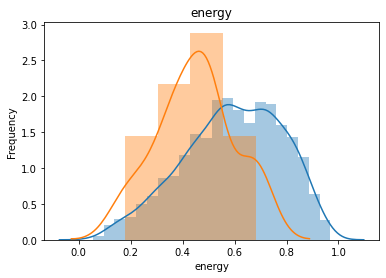

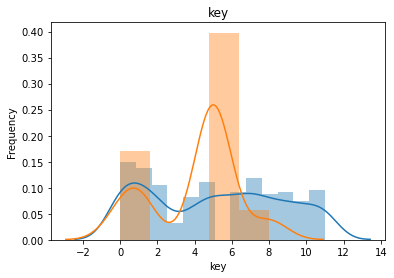

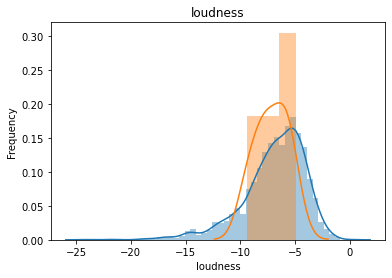

C:\Users\me\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


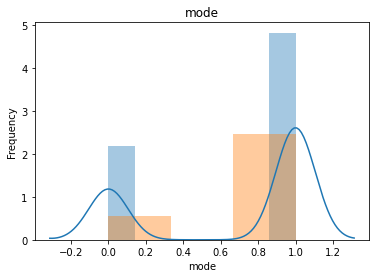

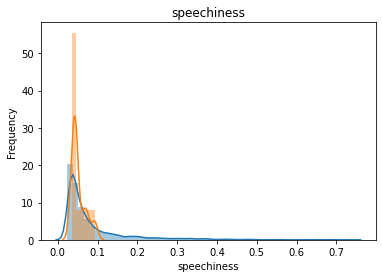

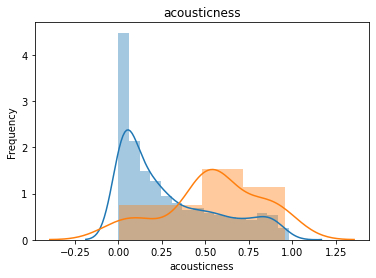

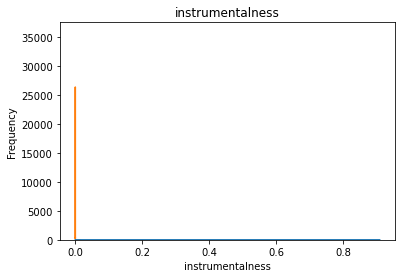

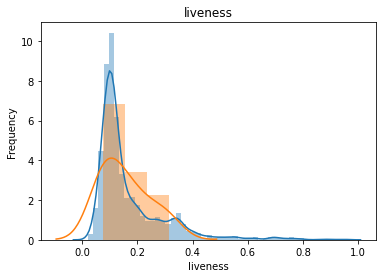

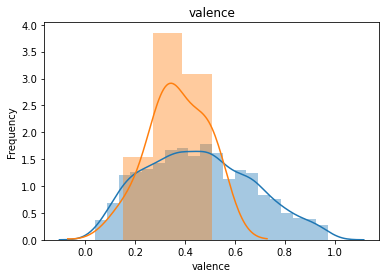

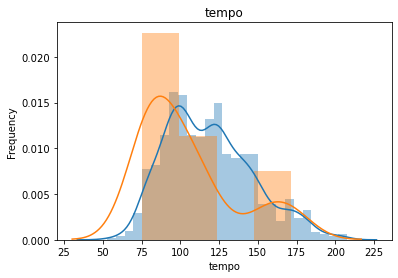

In [11]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(tracks_df[col]) #blue
    sns.distplot(tracks_df_sam_smith[col]) # orange
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Sam Smith is shown to have loud, slow songs, with high keys. The tempo is slightly slower than average, less danceable, and less energy but has the same valence compared to whole dataset. Also more acoustic than most songs. 